# Foundations of AI & ML
## Session 07
### Experiment 1 - Part 1 
### Applying Multi layer Perceptron on XOR data

#### Importing the required packages

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
import random

#### Generating the XOR data

In [2]:
amu = [[0, 0], [1, 1], [1, 0], [0, 1]]
samples = []
for a in amu:
    for i in range(30):
        samples.append([a[0] + random.random() * 0.4 - 0.2, a[1] + random.random() * 0.4 - 0.2]) 
# Converting list into array
samples = np.asarray(samples)
# Transpose the array
samples_plot = np.transpose(samples)
# Generating labels for the data
labels = np.hstack((np.ones((60,)), np.zeros((60, ))))
# Printing the labels
print(labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Plotting the data

In [3]:
import matplotlib.pyplot as plt
plt.plot(samples_plot[0][:60], samples_plot[1][:60], "b.")
plt.plot(samples_plot[0][60:], samples_plot[1][60:], "r.")
plt.show()

<Figure size 640x480 with 1 Axes>

**MultiLayer Perceptron **

An MLP can be viewed as a logistic regression classifier where the input is first transformed using a learnt non-linear transformation \Phi. This transformation projects the input data into a space where it becomes linearly separable. This intermediate layer is referred to as a hidden layer. A single hidden layer is sufficient to make MLPs a universal approximator.

#### Applying the MLP

In [4]:
clf = MLPClassifier(
    activation='relu', max_iter=10000, hidden_layer_sizes=(10,))
clf.fit(samples, labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

#### Calculating the accuracy and predicting the labels

In [5]:
print('score:', clf.score(samples, labels)) # Calculating the accuracy
print('predictions:', clf.predict(samples)) # predicting the values on entire data samples
print('expected:', labels) # Printing the expected labels

score: 1.0
predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
expected: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Plotting the data

In [6]:
xx, yy = np.mgrid[-0.5:1.5:.01, -0.5:1.5:.01] # Generating the mesh grid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape) # predicting the probabilities

[(-0.5, 1.5), Text(0,0.5,'$X_2$'), (-0.5, 1.5), Text(0.5,0,'$X_1$'), None]

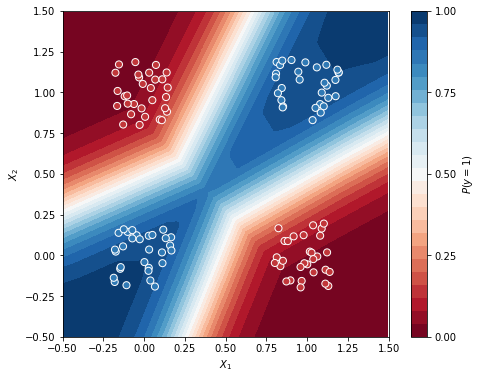

In [7]:
f, ax = plt.subplots(figsize=(8, 6)) 
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
# Plotting the samples
ax.scatter(samples[:,0], samples[:, 1], c=labels[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-0.5, 1.5), ylim=(-0.5, 1.5),
       xlabel="$X_1$", ylabel="$X_2$")